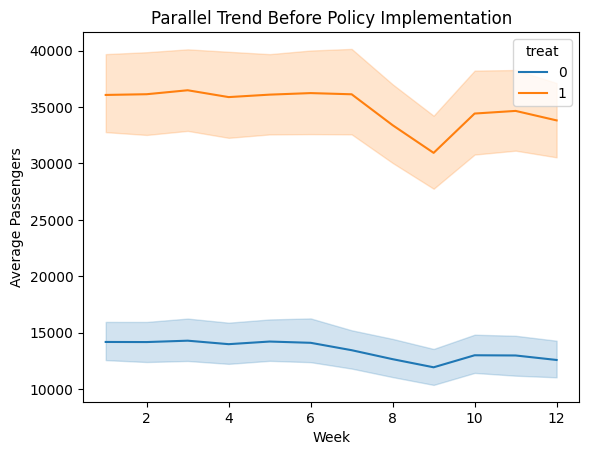

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('metro/result/metro_기후동행카드(역_week).csv') # Load data

df = df[df["기후동행카드"] != '승차 불가능 / 하차 가능'] # '승하차 가능', '승하차 불가능'인 역만 사용

df['승객수'] = df['승차총승객수'] + df['하차총승객수']

df['treat'] = df['기후동행카드'].apply(lambda x: 1 if x == '승하차 가능' else 0)


# Parallel Trend Analysis
pre_policy_df = df[df['after'] == 0]
pre_policy_trend = pre_policy_df.groupby(['week', 'treat'])['승객수'].mean().reset_index()

sns.lineplot(data=pre_policy_df, x='week', y='승객수', hue='treat')
plt.title('Parallel Trend Before Policy Implementation')
plt.xlabel('Week')
plt.ylabel('Average Passengers')
plt.show()

In [8]:
df['interaction'] = df['after'] * df['treat']

X = sm.add_constant(df[['after', 'treat', 'interaction']])
y = df['승객수']
did_model = sm.OLS(y, X).fit()
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    승객수   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     644.7
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:05:29   Log-Likelihood:            -1.2411e+05
No. Observations:               10745   AIC:                         2.482e+05
Df Residuals:                   10741   BIC:                         2.483e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.345e+04    489.522     27.469      

interaction term의 p value를 보면 통계적으로 전혀 유의미하지 않음을 확인.

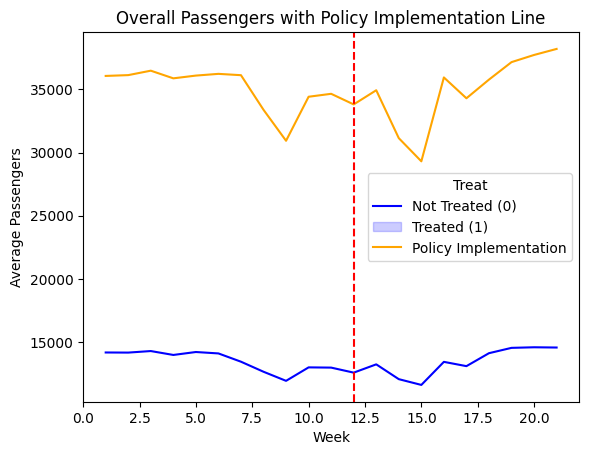

In [11]:
policy_trend = df.groupby(['week', 'treat'])['승객수'].mean().reset_index()

sns.lineplot(data=policy_trend, x='week', y='승객수', hue='treat', palette={0: 'blue', 1: 'orange'})
plt.axvline(x=12, color='red', linestyle='--', label='Policy Implementation')
plt.title('Overall Passengers with Policy Implementation Line')
plt.xlabel('Week')
plt.ylabel('Average Passengers')
plt.legend(title='Treat', labels=['Not Treated (0)', 'Treated (1)', 'Policy Implementation'])
plt.show()